In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings

# Suppress warnings
filterwarnings(action='ignore')

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Select only the numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Group by 'Survived' and calculate the mean for numeric columns
train.groupby('Survived')[numeric_cols].mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,,
0,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408


In [9]:
train[numeric_cols].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
male_ind = len(train[train['Sex'] == 'male'])
print("Number of Males in Titanic:", male_ind)

Number of Males in Titanic: 577


In [12]:
female_ind = len(train[train['Sex'] == 'female'])
print("Number of Females in Titanic:", female_ind)

Number of Females in Titanic: 314


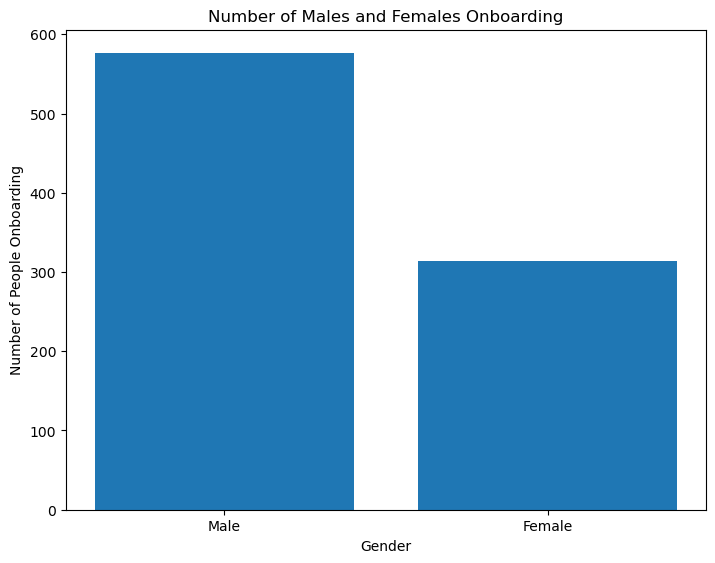

In [14]:
# Plot the number of males and females on board
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
index = [577, 314]
ax.bar(gender, index)
plt.xlabel("Gender")
plt.ylabel("Number of People Onboarding")
plt.title("Number of Males and Females Onboarding")
plt.show()

In [15]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [19]:
train.groupby('Sex')[['Survived']].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000021103B86DD0>>

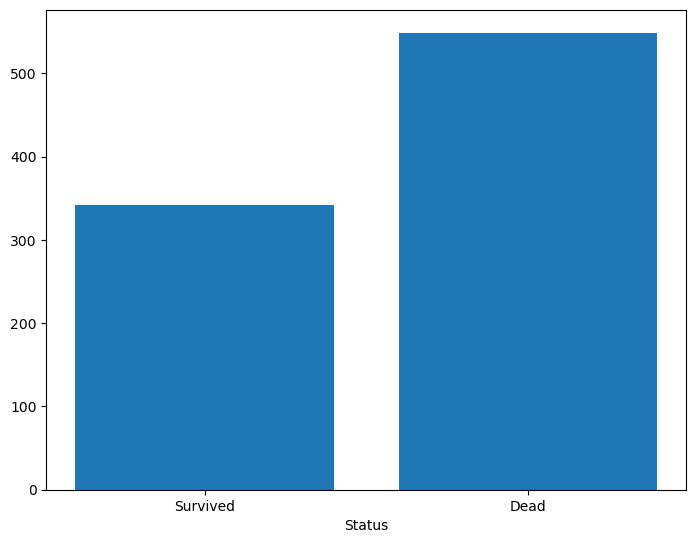

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived', 'Dead']
ind = [alive, dead]
ax.bar(status, ind)
plt.xlabel("Status")
plt.show()

Text(0, 0.5, 'Number of People')

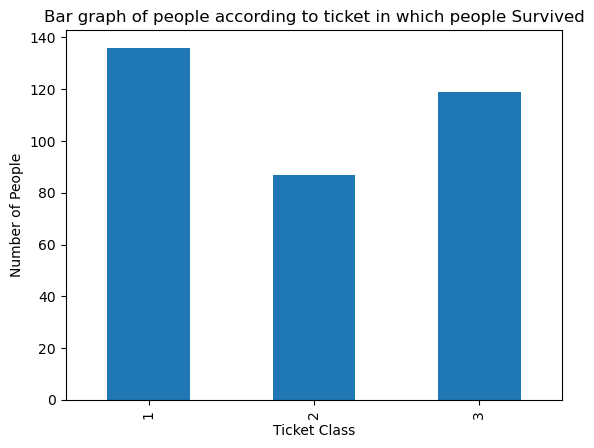

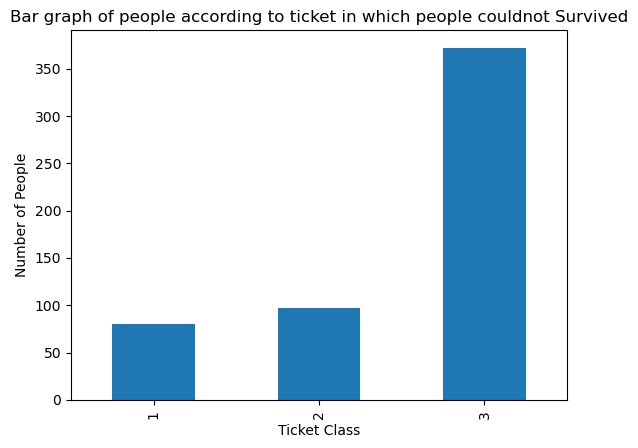

In [18]:
  # Plot ticket class distribution for people who survived
plt.figure(1)
survived_pclass = train[train['Survived'] == 1]['Pclass'].value_counts().sort_index()
survived_pclass.plot(kind='bar')
plt.title('Bar graph of people according to ticket in which people Survived')
plt.xlabel('Ticket Class')
plt.ylabel('Number of People')

# Plot ticket class distribution for people who did not survive
plt.figure(2)
not_survived_pclass = train[train['Survived'] == 0]['Pclass'].value_counts().sort_index()
not_survived_pclass.plot(kind='bar')
plt.title('Bar graph of people according to ticket in which people couldnot Survived')
plt.xlabel('Ticket Class')
plt.ylabel('Number of People')

([<matplotlib.axis.XTick at 0x21104da7c50>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

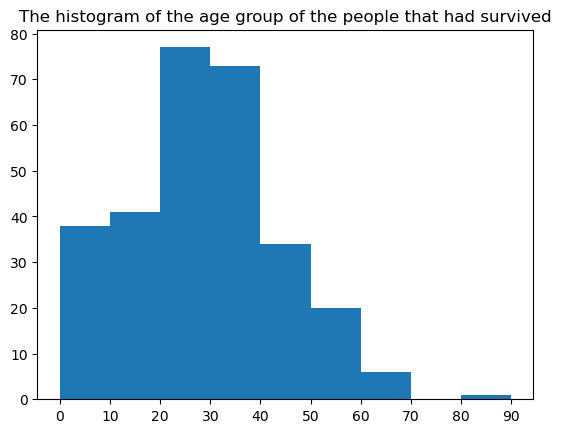

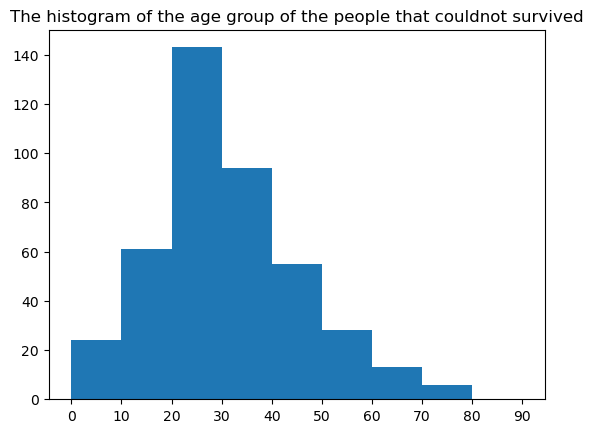

In [21]:
plt.figure(1)
age  =train.loc[train.Survived ==1, 'Age']
plt.title('The histogram of the age group of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.figure(2)
age  =train.loc[train.Survived ==0, 'Age']
plt.title('The histogram of the age group of the people that couldnot survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [23]:
train[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
train[["Pclass","Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
train[["Age","Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [26]:
train[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


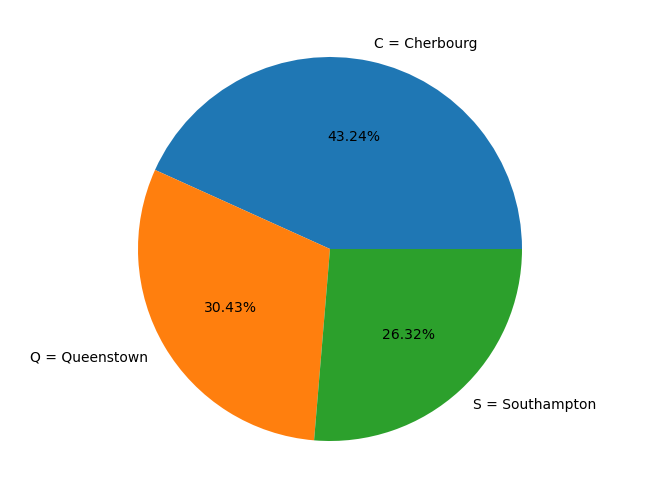

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571, 0.389610, 0.336957]
ax.pie(s, labels=l, autopct='%1.2f%%')
plt.show()

In [18]:
test.describe(include='all')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [31]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [33]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [34]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=train[column_train]
y=train['Survived']

In [35]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [56]:
data = {
    'Age': [22, 35, None, 27, None, 29, 24]
}

# Create the DataFrame
X = pd.DataFrame(data)

# Fill missing values in the 'Age' column with the median age using .loc
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].median())

# Check for any remaining missing values in the 'Age' column
print(X['Age'].isnull().sum())

0


In [57]:
# Example DataFrame creation
data = {
    'Embarked': ['S', None, 'C', 'Q', None, 'S', 'C']
}

# Create the DataFrame
train = pd.DataFrame(data)

# Copy the DataFrame to X (assuming you want to work on a subset)
X = train.copy()

# Fill missing values in the 'Embarked' column using the 'pad' method with .loc
X.loc[:, 'Embarked'] = train['Embarked'].fillna(method='pad')

# Check for any remaining missing values in the 'Embarked' column
print(X['Embarked'].isnull().sum())

0


In [58]:
# Example DataFrame creation
data = {
    'Sex': ['male', 'female', 'female', 'male', 'male']
}

# Create the DataFrame
X = pd.DataFrame(data)

# Dictionary for mapping
d = {'male': 0, 'female': 1}

# Apply the mapping using .loc to avoid the warning
X.loc[:, 'Sex'] = X['Sex'].apply(lambda x: d[x])

# Display the first few rows of the 'Sex' column
print(X['Sex'].head())

0    0
1    1
2    1
3    0
4    0
Name: Sex, dtype: object


In [59]:
# Example DataFrame creation
data = {
    'Embarked': ['S', 'C', 'Q', 'S', 'C']
}

# Create the DataFrame
X = pd.DataFrame(data)

# Dictionary for mapping
e = {'C': 0, 'Q': 1, 'S': 2}

# Apply the mapping using .loc to avoid the warning
X.loc[:, 'Embarked'] = X['Embarked'].apply(lambda x: e[x])

# Display the first few rows of the 'Embarked' column
print(X['Embarked'].head())

0    2
1    0
2    1
3    2
4    0
Name: Embarked, dtype: object


In [60]:
from sklearn.model_selection import train_test_split

# Example data
import pandas as pd

data = {
    'Age': [22, 35, 27, 29, 24],
    'Sex': [0, 1, 1, 0, 0],
    'Embarked': [2, 0, 1, 2, 0],
    'Survived': [0, 1, 1, 0, 1]  # Assuming 'Survived' is the target variable
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['Age', 'Sex', 'Embarked']]
Y = df['Survived']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Display the shapes of the splits to confirm
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3, 3) (2, 3) (3,) (2,)
